In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

cv2.__version__

'3.4.1'

In [38]:
img = cv2.imread('digit.jpg')

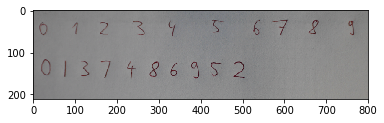

In [39]:
plt.imshow(img)

In [40]:
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

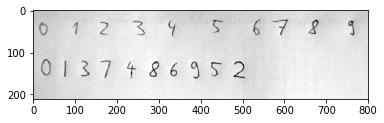

In [41]:
plt.imshow(im_gray, cmap='gray')

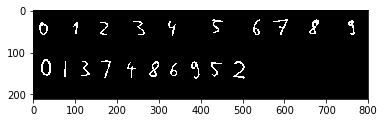

In [42]:
ret, im_th = cv2.threshold(im_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im_th = cv2.bitwise_not(im_th)
# kernel = np.ones((3,3),np.uint8)
# im_th = cv2.dilate(im_th,kernel,iterations = 1)
plt.imshow(im_th, cmap='gray')

In [43]:
_, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

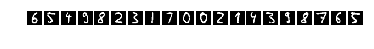

In [44]:
fig, axarr = plt.subplots(1, len(rects))
i = 0
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (119, 244, 66), 2) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.4)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))

    axarr[i].imshow(roi, cmap="gray")
    axarr[i].axis('off')
    i += 1


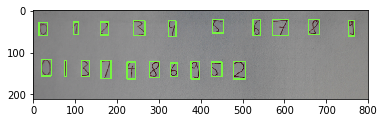

In [45]:
plt.imshow(img)